In [1]:
#Seattle Weather Project
#The purpose of this project is to determine if it rains more in Quebec City or Seattle. Seattle is viewed as a city that receives a lot of rain. 
#There is uncertainty regarding which city receives more rain. An analysis is needed to determine if it rains more in Seattle or Quebec City. 
#We will compare daily precipitation rates gathered by NOAA weather stations in Seattle, Washington and Quebec City, Quebec over the time period 1/1/2018-12/31/2022.
#The analysis was completed by combining the two DataFrames for Seattle and Quebec City. Missing precipitation and date values were imputed.
#The analysis included summary statistics and a variety of visualizations, including line plots, boxplots, and bar charts.

In [2]:
#Section 1
#Start by importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
sns.set_style("whitegrid")

In [3]:
#Load the data
#The variable df_seattle will be used to represent the Seattle weather data. The variable df_quebec represents Quebec weather.
df_seattle = pd.read_csv('https://raw.githubusercontent.com/elarson5/DATA-5100-weather/main/data/seattle_rain.csv')
df_quebec = pd.read_csv('https://raw.githubusercontent.com/elarson5/DATA-5100-weather/main/data/quebec_rain.csv')

In [4]:
#Use type() to check the type of object we loaded 
type(df_seattle)

pandas.core.frame.DataFrame

In [5]:
#Output confirms this is a DataFrame through Pandas 

In [6]:
type(df_quebec)

pandas.core.frame.DataFrame

In [7]:
#Explore the data by using .head() to view top of data frame 

In [8]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [9]:
df_quebec.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,CA1PE000010,"NEW LONDON 1.6 ENE, PE CA",2018-01-01,NaN,NaN,0.0,0.0,2.5
1,CA1PE000010,"NEW LONDON 1.6 ENE, PE CA",2018-01-02,NaN,NaN,0.0,0.0,2.5
2,CA1PE000010,"NEW LONDON 1.6 ENE, PE CA",2018-01-03,NaN,NaN,0.0,0.0,2.5
3,CA1PE000010,"NEW LONDON 1.6 ENE, PE CA",2018-01-04,NaN,NaN,0.0,0.0,2.5
4,CA1PE000010,"NEW LONDON 1.6 ENE, PE CA",2018-01-05,NaN,NaN,0.9,2.6,2.0


In [10]:
#You can also call a list of column names by using .columns

In [11]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [12]:
df_quebec.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

In [13]:
#View a summary of each data frame by using .info()

In [14]:
df_quebec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1773 non-null   object 
 1   NAME     1773 non-null   object 
 2   DATE     1773 non-null   object 
 3   DAPR     8 non-null      float64
 4   MDPR     8 non-null      float64
 5   PRCP     1765 non-null   float64
 6   SNOW     1761 non-null   float64
 7   SNWD     1583 non-null   float64
dtypes: float64(5), object(3)
memory usage: 110.9+ KB


In [15]:
#The output RangeIndex tells us there are 1773 rows ranging from 0 to 1772. 
#There are 8 columns
#In DATE there are 1773 non-null values
#In PRCP there are 1765 non-null values

In [16]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [17]:
#The output RangeIndex tells us there are 1658 rows ranging from 0 to 1657. 
#There are 10 columns
#In DATE there are 1773 non-null values
#In PRCP there are 1765 non-null values

In [18]:
#During initial exploration, you can also use .shape

In [19]:
print(df_seattle.shape)

(1658, 10)


In [20]:
#The output is confirming there are 1658 rows and 10 columns

In [21]:
print(df_quebec.shape)

(1773, 8)


In [22]:
#The output is confirming there are 1773 rows and 8 columns

In [23]:
#Section 2: Assess the suitability of the data for the problem
#In this section we will assess if the data will be useful in addressing our primary question
#regarding if it rains more in Seattle or Quebec

In [24]:
#The precipitation came from NOAA weather stations. We want to know how many weather stations are in each data frame. 
#Look at the variable "Station" and count the number of unique values using .nunique()

In [25]:
df_quebec['STATION'].nunique()

1

In [26]:
df_seattle["STATION"].nunique()

1

In [27]:
#The result of 1 for both Seattle and Quebec indicate both DataFrame have 1 weather station. 

In [28]:
#Now we will look at the variable "DATE". They should be in the same format for analysis

In [29]:
df_seattle["DATE"]

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

In [30]:
#The date format is in M/D/YY. The number of rows in 1658, indicating there may be some missing dates. We can look at the
#the of the DataFrame by using .max() and .tail()

In [31]:
df_seattle["DATE"].max()

'9/9/22'

In [32]:
df_seattle["DATE"].tail()

1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, dtype: object

In [33]:
#When using .max() the max date is 9/9/22 but when the end of the DataFrame is viewed we can see the final date of 
#observation is 12/31/22. There may be slight format differences causing a misrepresentation in the way the dates are read

In [34]:
df_quebec["DATE"]

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
1768    2022-12-27
1769    2022-12-28
1770    2022-12-29
1771    2022-12-30
1772    2022-12-31
Name: DATE, Length: 1773, dtype: object

In [35]:
df_quebec["DATE"].max()

'2022-12-31'

In [36]:
df_quebec["DATE"].tail()

1768    2022-12-27
1769    2022-12-28
1770    2022-12-29
1771    2022-12-30
1772    2022-12-31
Name: DATE, dtype: object

In [37]:
#In the Quebec DataFrame the final date we observe using .max() matches the final date we observe using .tail(): 12/21/22. 

In [38]:
#The format of the DATE variable needs to be the same for each Quebec and Seattle. We will use .to_datetime() 
#on DATE for both Seattle and Quebec to ensure they are in the same YYYY-MM-DD format and are the data type date time

In [39]:
df_seattle["DATE"]= pd.to_datetime(df_seattle["DATE"])

C:\Users\emily\AppData\Local\Temp\ipykernel_16508\586432764.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle["DATE"]= pd.to_datetime(df_seattle["DATE"])


In [40]:
df_quebec["DATE"]= pd.to_datetime(df_quebec["DATE"])

In [41]:
df_seattle["DATE"]

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

In [42]:
#The values in the variable DATE in Seattle have been converted to date time

In [43]:
df_quebec["DATE"]

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1768   2022-12-27
1769   2022-12-28
1770   2022-12-29
1771   2022-12-30
1772   2022-12-31
Name: DATE, Length: 1773, dtype: datetime64[ns]

In [44]:
#The values in the variable DATE in Quebec have been converted to date time

In [45]:
#We want to ensure the minimum and maximum values in DATE fall within the time period we selected 2018-01-01 to 2022-12-31

In [46]:
df_seattle["DATE"].agg(["min", "max"])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [47]:
df_quebec["DATE"].agg(["min", "max"])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [48]:
#The mimumum and maximum values of DATE are 2018-01-01 and 2022-12-31, and the data type is date time

In [49]:
#Section 3: Select Relevant Subsets of the Data
#In section 3 we will select the relevant subsets of data as we prepare to merge

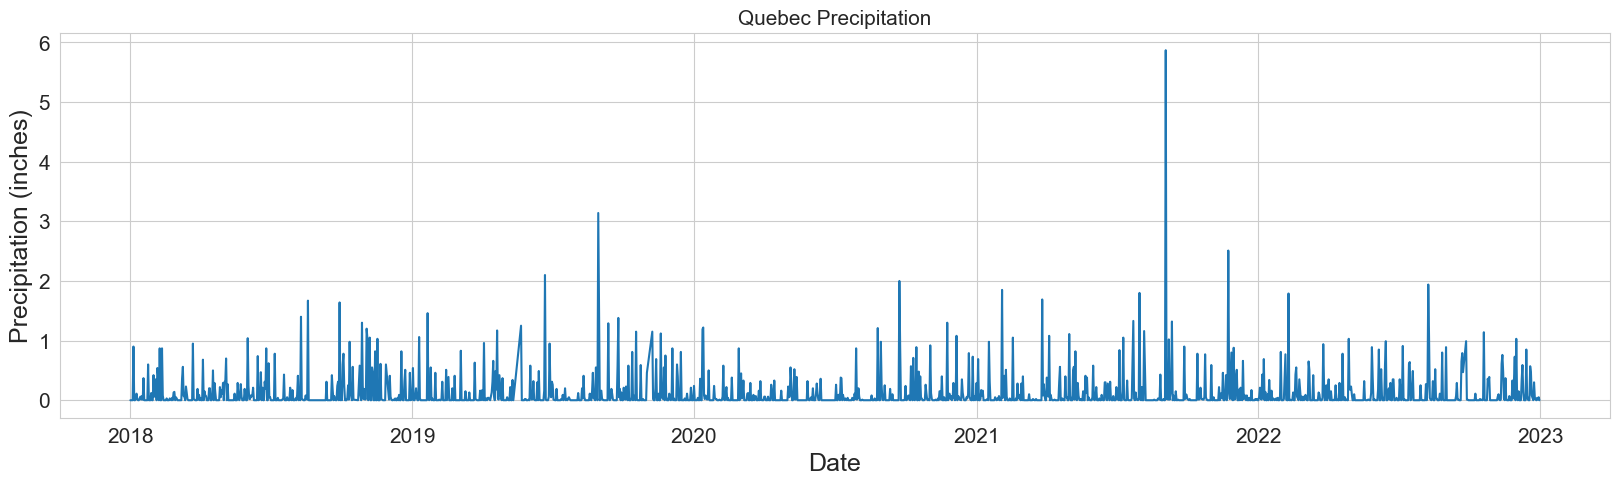

In [50]:
#Plot a graph to visualize Quebec Precipitation
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_quebec, x="DATE", y="PRCP")
plt.title("Quebec Precipitation", fontsize=15)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Precipitation (inches)", fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

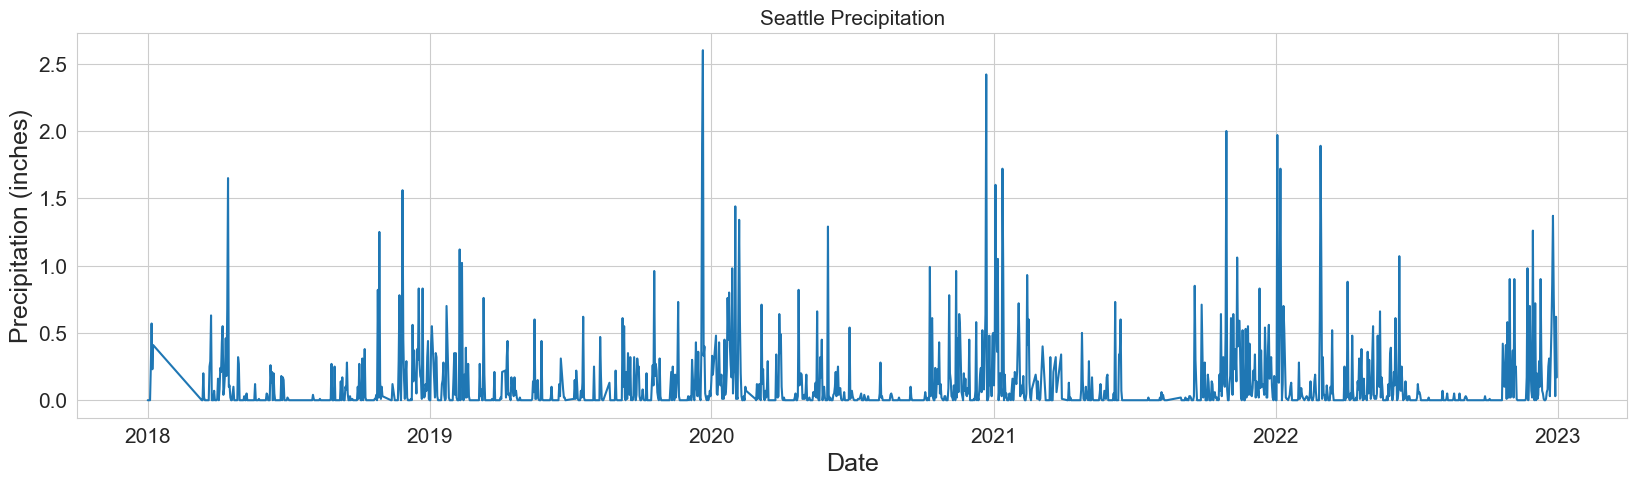

In [51]:
#Do the same for Seattle Precipitation
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_seattle, x="DATE", y="PRCP")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Precipitation (inches)", fontsize=18)
plt.title("Seattle Precipitation", fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

In [52]:
df_seattle['PRCP'].count()

np.int64(1636)

In [53]:
#There are 1636 recorded values of PRCP, or precipitation, for Seattle

In [54]:
df_quebec['PRCP'].count()

np.int64(1765)

In [55]:
#There are 1765 recorded values of PRCP, or precipitation, for Quebec

In [56]:
#At this point we are aware there are missing values of precipitation for both Quebec and Seattle. 
#If there are 365 days a year, over 5 years, accounting for 1 day of leap year, there should be 1826 counted for each city
#(365*5)+1=1826
#We will address these missing values in an upcoming section

In [57]:
#Section 4: Merging and Tidying Data
#In this section we will work on merging the data making it tidy for analysis. 
#We will start by again observing the head of each DataFrame

In [58]:
df_seattle.head(2)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [59]:
df_quebec.head(2)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,CA1PE000010,"NEW LONDON 1.6 ENE, PE CA",2018-01-01,NaN,NaN,0.0,0.0,2.5
1,CA1PE000010,"NEW LONDON 1.6 ENE, PE CA",2018-01-02,NaN,NaN,0.0,0.0,2.5


In [60]:
#Use the following code to merge Seattle and Quebec

In [61]:
df= df_quebec[["DATE", "PRCP"]].merge(df_seattle[["DATE", "PRCP"]], on="DATE", how= "outer")

In [62]:
#The code above shows that we are selecting only DATE and PRCP from both DataFrames
#on="DATE" means the two DataFrames are being merged on the DATE column
#how="outer" means this is a full join, so it will keep all dates from each DataFrame, even if a date appears 
#in only of the DataFrames

In [63]:
#Observe the DataFrame created by merging Seattle and Quebec
df

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.90,0.25
...,...,...,...
1819,2022-12-27,0.00,0.78
1820,2022-12-28,0.04,0.40
1821,2022-12-29,0.01,0.03
1822,2022-12-30,0.05,0.62


In [64]:
#Now we will use .melt() to transform the DataFrame from a wide format to a long format. Right now PRCP_x and PRCP_y are in different columns. 
#The .melt() function will move the two columns into one column
df= pd.melt(df, id_vars="DATE", var_name="city", value_name="precipitation")

In [65]:
df.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,0.9


In [66]:
df.tail()

,DATE,city,precipitation
3643,2022-12-27,PRCP_y,0.78
3644,2022-12-28,PRCP_y,0.40
3645,2022-12-29,PRCP_y,0.03
3646,2022-12-30,PRCP_y,0.62
3647,2022-12-31,PRCP_y,0.17


In [67]:
#Now we want to rename the variables PRCP_x and PRCP_y to identify with Seattle and Quebec. 
#We will use "YQB" to represent Quebec and "SEA" to represent Seattle.
df.loc[df["city"] == "PRCP_x", "city"] = "YQB"
df.loc[df["city"] == "PRCP_y", "city"] = "SEA" 

In [68]:
#We will use the .rename() function to rename DATE to date for increased readability
df = df.rename(columns={"DATE": "date"})

In [69]:
df.head()

,date,city,precipitation
0,2018-01-01,YQB,0.0
1,2018-01-02,YQB,0.0
2,2018-01-03,YQB,0.0
3,2018-01-04,YQB,0.0
4,2018-01-05,YQB,0.9


In [70]:
df.tail()

,date,city,precipitation
3643,2022-12-27,SEA,0.78
3644,2022-12-28,SEA,0.40
3645,2022-12-29,SEA,0.03
3646,2022-12-30,SEA,0.62
3647,2022-12-31,SEA,0.17


In [71]:
#Section 5: Identifying and imputing missing values through imputation

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3648 non-null   datetime64[ns]
 1   city           3648 non-null   object        
 2   precipitation  3401 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.6+ KB


In [73]:
#The output from df.info() is stating:
#RangeIndex: there are 3648 rows, 0 to 3647
#Each row in the columns date and city have a value
#There are some missing values for precipitation 3648-3401=247

In [74]:
#The following code will tell us how many non-missing (non NaN) values there are in date, city, and precipitation
df.notna().sum()

date             3648
city             3648
precipitation    3401
dtype: int64

In [75]:
#Can using the following code to determine how many missing (NaN) values there are 
df.isna().sum()

date               0
city               0
precipitation    247
dtype: int64

In [76]:
#The output shows there is data in each row but there are 246 missing values

In [77]:
#We will filter the DataFrame to see how many NaN values there are for Seattle
df.loc[df["city"] == "SEA", "precipitation"].isna().sum()

np.int64(188)

In [78]:
#There are 188 NaN values

In [79]:
#We will filter the DataFrame to see how many NaN values there are for Quebec
df.loc[df["city"] == "YQB", "precipitation"].isna().sum()

np.int64(59)

In [80]:
#There are 59 NaN values in Quebec. This helps confirm the total missing NaN values: 188+59=247

In [81]:
#Add a new column day_of_year to the DataFrame
df["day_of_year"] = pd.DatetimeIndex(df["date"]).day_of_year

In [82]:
df.head(10)

,date,city,precipitation,day_of_year
0,2018-01-01,YQB,0.00,1
1,2018-01-02,YQB,0.00,2
2,2018-01-03,YQB,0.00,3
3,2018-01-04,YQB,0.00,4
4,2018-01-05,YQB,0.90,5
5,2018-01-06,YQB,0.00,6
6,2018-01-07,YQB,0.00,7
7,2018-01-08,YQB,0.03,8
8,2018-01-09,YQB,0.11,9
9,2018-01-10,YQB,0.01,10


In [83]:
#Calculate the main daily precipitation for Seattle grouped by the day_of_year 
mean_day_precipitation = df.loc[
    df["city"] == "SEA",  
    ["precipitation", "day_of_year"]
].groupby(
    "day_of_year"
).mean()  

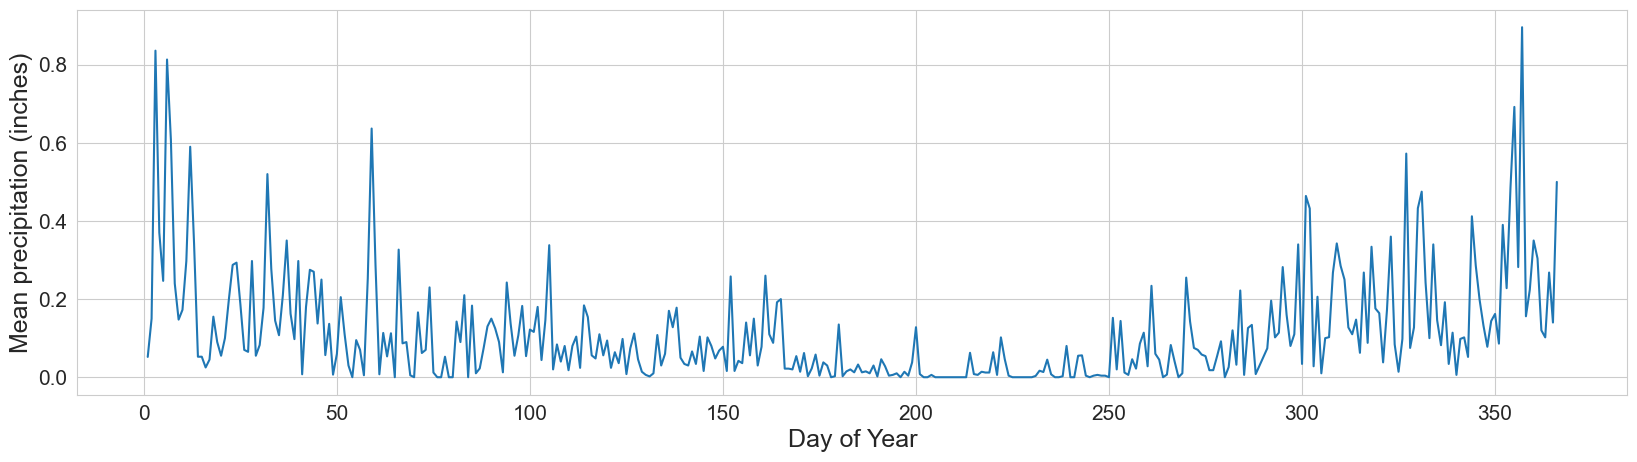

In [84]:
#Now we plot the mean daily precipitation for Seattle
plt.figure(figsize=(20, 5))

sns.lineplot(data= mean_day_precipitation, x= "day_of_year", y="precipitation")

plt.xlabel("Day of Year", fontsize= 18)
plt.ylabel("Mean precipitation (inches)", fontsize=18)

plt.tick_params(labelsize=15)
plt.show()

In [85]:
#Use the following code .isna() to determine rows that contain NaN values and returns True if they do
df["precipitation"].isna() == True

0       False
1       False
2       False
3       False
4       False
        ...  
3643    False
3644    False
3645    False
3646    False
3647    False
Name: precipitation, Length: 3648, dtype: bool

In [86]:
#Set the variable indices to store where precipitation is missing (NaN)
indices = np.where(df["precipitation"].isna() == True)[0]

In [87]:
indices

array([ 129,  197,  223,  233,  234,  235,  236,  237,  238,  239,  240,
        241,  242,  243,  244,  245,  246,  247,  248,  249,  250,  290,
        291,  292,  293,  294,  332,  333,  334,  381,  382,  383,  444,
        497,  498,  499,  500,  501,  502,  503,  504,  505,  606,  608,
        614,  615,  669,  670,  671,  672,  673,  674, 1265, 1345, 1372,
       1375, 1725, 1726, 1727, 1832, 1833, 1834, 1835, 1836, 1837, 1838,
       1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849,
       1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       2088, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138,
       2193, 2194, 2195, 2212, 2213, 2242, 2243, 2244, 2245, 2246, 2247,
       2284, 2285, 2286, 2360, 2361, 2366, 2367, 23

In [88]:
#Fill in missing precipitation values by replacing them with the average precipitation using the same day of other years
for index in indices:
    df.loc[index, "precipitation"] = mean_day_precipitation.loc[df.loc[index, "day_of_year"]].values[0]

In [89]:
#Check for missing values (NaNs)
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

In [90]:
#Count how many days of precipitation are counted
df["precipitation"].count()

np.int64(3648)

In [91]:
#There are 3648 counted. There are missing dates. There should be 1826 values per year and 3652 total/

In [92]:
#Use .duplicated().sum() to check the total number of duplicates for each city
print("YQB:", df_quebec["DATE"].duplicated().sum())
print("SEA:", df_seattle["DATE"].duplicated().sum())

YQB: 0
SEA: 0


In [93]:
#Use .nunique() to see the number of unqiue values
print("YQB:", df_quebec["DATE"].nunique())
print("SEA:", df_seattle["DATE"].nunique())

YQB: 1773
SEA: 1658


In [94]:
#Generate a complete list of dates between the minimum and maximum values in the data
min_date = df['date'].min()
max_date = df['date'].max()
complete_dates = pd.date_range(start=min_date, end=max_date, freq='D')

In [95]:
#Extract list of dates present in data per city
for city_name in df['city'].unique():
    city_data = df[df['city'] == city_name]
    city_dates = city_data['date']

In [96]:
#Create a list of missing dates for each city by comparing dates that are present in city_dates compared to complete date range in complete_dates
missing_dates = pd.DataFrame({'date': complete_dates[~complete_dates.isin(city_dates)]})

In [97]:
#Print the missing dates when len(missing_dates)>0
print(f"{city_name} has {len(missing_dates)} missing dates")
if len(missing_dates) > 0:
        print(missing_dates.head())

SEA has 2 missing dates
        date
0 2019-07-04
1 2020-09-26


In [98]:
#Create a new DataFrame with the complete dates
new_df = pd.DataFrame() 

for city_name in df['city'].unique():
    city_template = pd.DataFrame({
        'date': complete_dates,
        'city': city_name})
    
    city_data = df[df['city'] == city_name]
    
    merged_city = pd.merge(city_template, city_data, on=['date', 'city'], how='left')
    
    merged_city['day_of_year'] = merged_city['date'].dt.dayofyear
    
    new_df = pd.concat([new_df, merged_city])

In [105]:
#Other approach to filling in missing values (NaNs) through using average values of days in other years
def fill_by_day_of_year(group):
    for day in range(1, 367):  
        day_mean = group[group['day_of_year'] == day]['precipitation'].mean()
        if not pd.isna(day_mean):
            group.loc[(group['day_of_year'] == day) & (group['precipitation'].isna()), 'precipitation'] = day_mean
    return group

new_df = new_df.groupby('city').apply(fill_by_day_of_year).reset_index(drop=True) #Applies the missing values per city in new DataFrame

C:\Users\emily\AppData\Local\Temp\ipykernel_16508\2376268.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  new_df = new_df.groupby('city').apply(fill_by_day_of_year).reset_index(drop=True)


In [104]:
#Confirm count of precipitation values
new_df["precipitation"].count()

np.int64(3652)

In [101]:
#Section 6: Analysis

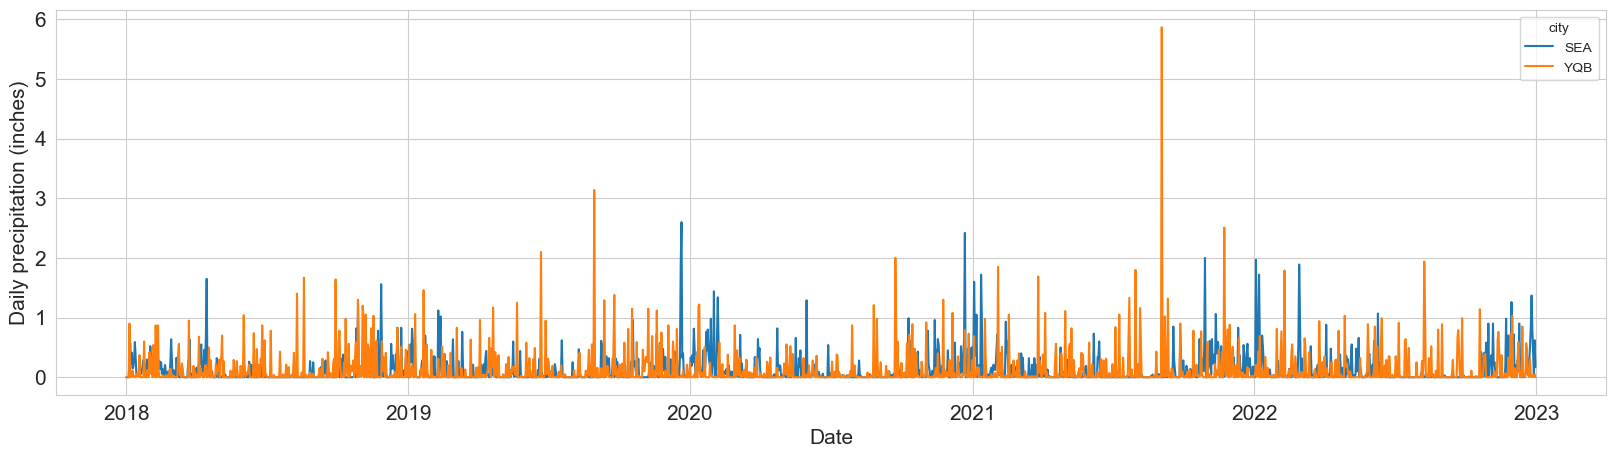

In [106]:
plt.figure(figsize=(20, 5))

sns.lineplot(data= new_df, x= "date", y="precipitation", hue= "city")

plt.xlabel("Date", fontsize= 15)
plt.ylabel("Daily precipitation (inches)", fontsize=15)

plt.tick_params(labelsize=15)
plt.show()

In [107]:
#The lineplot shows the precipitation in Seattle and Quebec from 2018-2022. It shows the precipitation generally remains less than 3 inches.
#There are two cases where the precipitation exceeds 3 inches in Quebec. One time near the end of 2019 it reaches about 3.1 inches. Near the end of 2021 it reaches almost 6 inches.
#From this view, it looks like Quebec has some days with higher max of rain but there is otherwise not a large difference between the cities 


In [108]:
#Create a table of summary statistics grouped by city by using .describe()
new_df[["city", "precipitation"]].groupby("city").describe()

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60
YQB         1826.0  0.124906  0.310207  0.0  0.0  0.00  0.09  5.87

In [109]:
#This shows there are 1826 values for Seattle and Quebec. The mean precipitation for Seattle is 0.11, while Quebec's is only slightly higher at 0.12. 
#Quebec has a higher max precipitation of 5.87 while Seattle's max precipitation is 2.60
#The average precipitation between the two cities is similar, however Quebec has a higher max

In [110]:
#To view just the average, use .groupy("city") and .mean() to show average per city
new_df[["city", "precipitation"]].groupby("city").mean()

,precipitation
city,
SEA,0.113270
YQB,0.124906


In [111]:
#We can observe this yields the same average values as .describe()

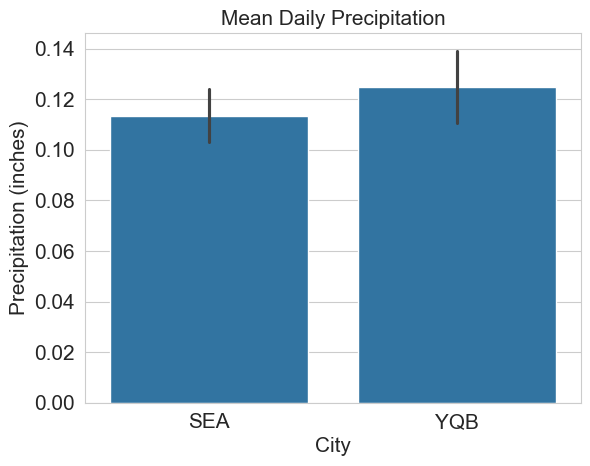

In [112]:
#Now plot these mean values using .barplot. Set labels for the x and y axes
sns.barplot(data=new_df, x="city", y="precipitation")

plt.ylabel("Precipitation (inches)", fontsize=15)
plt.xlabel("City", fontsize= 15)
plt.title("Mean Daily Precipitation", fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

In [113]:
#This graph shows visually that the mean daily precipitation is slightly higher in Quebec than Seattle 

In [114]:
#The previous analysis looked at average mean daily precipitation
#We will now view precipitation by month
#The following code assigns a new variable month to the data
new_df["month"] = pd.DatetimeIndex(new_df["date"]).month
new_df.head()
new_df["month"].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
3647    12
3648    12
3649    12
3650    12
3651    12
Name: month, Length: 3652, dtype: int32>

In [115]:
new_df.head() #View the new column for month

,date,city,precipitation,day_of_year,month
0,2018-01-01,SEA,0.00,1,1
1,2018-01-02,SEA,0.00,2,1
2,2018-01-03,SEA,0.00,3,1
3,2018-01-04,SEA,0.00,4,1
4,2018-01-05,SEA,0.25,5,1


In [116]:
#This shows us month was succesfully added 

In [117]:
#Use .unique() to verify the DataFrame contains 12 unique values to represent the 12 months 
new_df["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

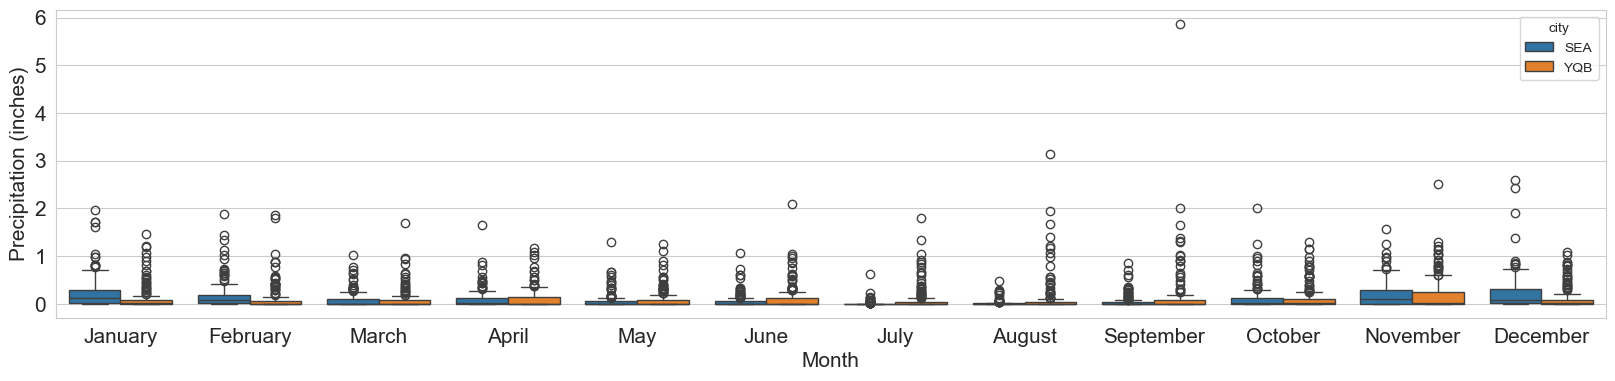

In [118]:
#Plot distribution of precipitation amounts each month using boxplots
plt.figure(figsize=(20, 4))

sns.boxplot(data=new_df, x="month", y="precipitation", hue="city")

plt.xlabel("Month", fontsize=15)
plt.ylabel("Precipitation (inches)", fontsize=15)

plt.tick_params(labelsize=15)

import calendar
month_names= list(calendar.month_name[1:])
plt.xticks(ticks=range(12), labels=month_names)
plt.show()

In [119]:
#The boxplot shows precipitation in each month for Seattle and Quebec. There are a lot of overlapping values impacting readability. 

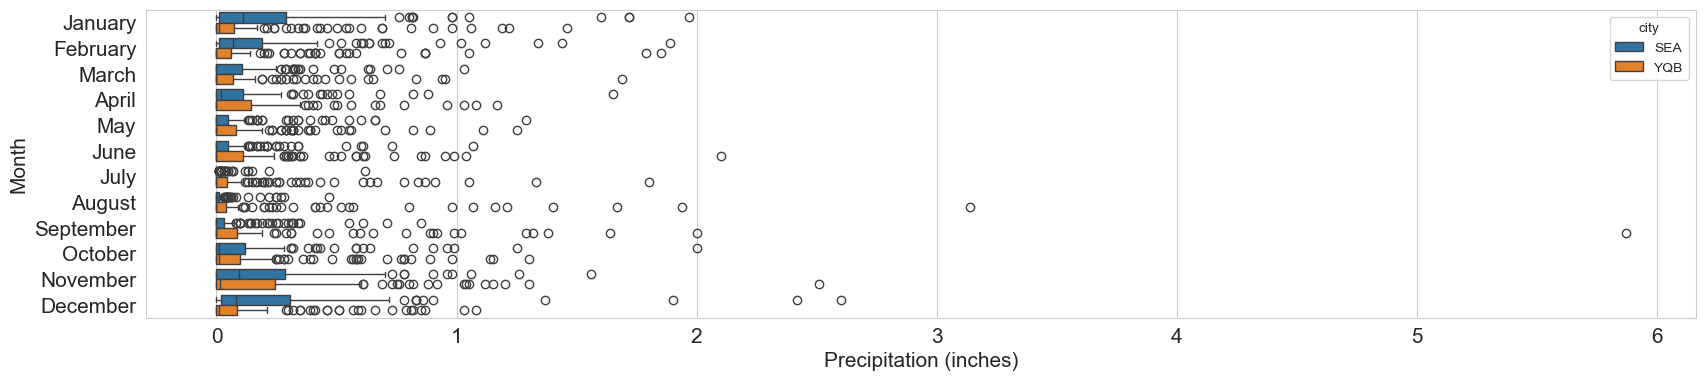

In [120]:
#This can also be rotated so that months are on the y axis and precipitation on the x axis.
plt.figure(figsize=(20, 4))

sns.boxplot(data=new_df, x="precipitation", y="month", hue="city", orient="h")

plt.ylabel("Month", fontsize=15)
plt.xlabel("Precipitation (inches)", fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)
plt.show()

In [121]:
#This does not improve readability. There are other options to view the boxplot, including reducing the view 

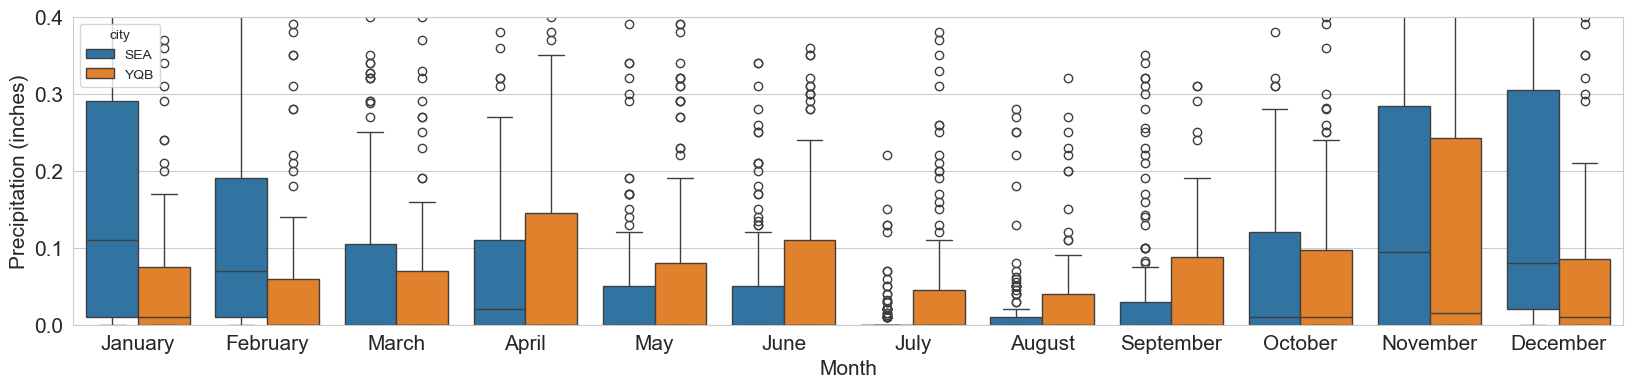

In [122]:
#In the code below, the y axis has been limited down to 0.4 
plt.figure(figsize=(20, 4))

sns.boxplot(data=new_df, x="month", y="precipitation", hue="city")

plt.xlabel("Month", fontsize=15)
plt.ylabel("Precipitation (inches)", fontsize=15)

plt.tick_params(labelsize=15)
plt.xticks(ticks=range(12), labels=month_names)

plt.ylim(0, .4)
plt.show()

In [123]:
#Now we want to see monthly values by using the mean. 
#Calculate mean monthly values by city by using .group(["city", "month"]) and .mean()
new_df[["month", "precipitation", "city"]].groupby(["city", "month"]).mean()

precipitation
city month               
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903
YQB  1           0.115871
     2           0.125035
     3           0.085290
     4           0.110000
     5           0.097768
     6           0.124617
     7           0.103413
     8           0.130684
     9           0.173890
     10          0.127226
     11          0.194650
     12          0.113781

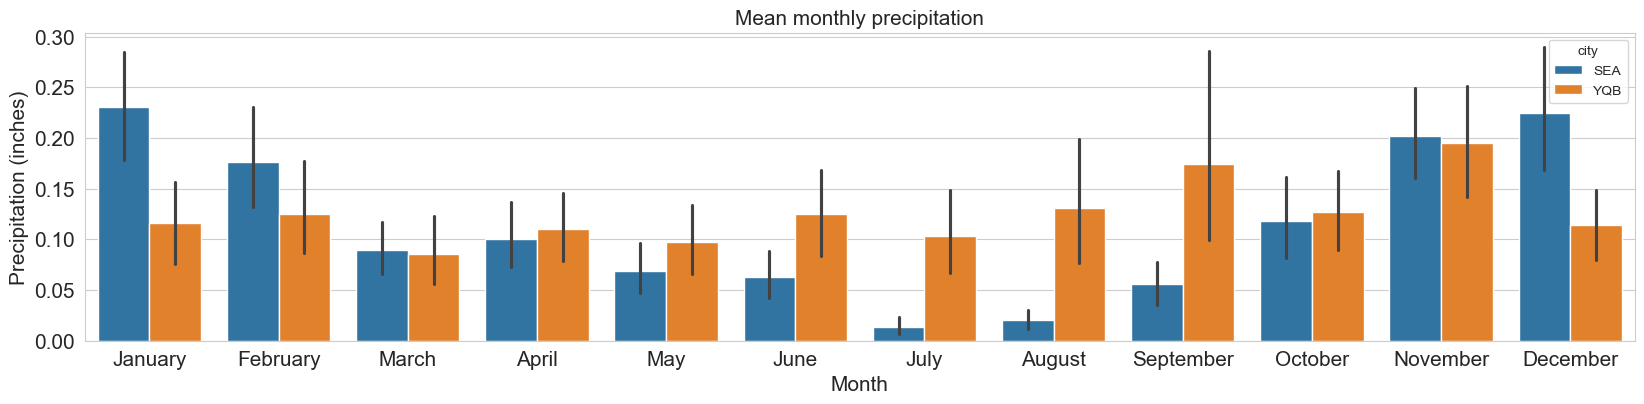

In [124]:
#Plot the mean precipitation each month
plt.figure(figsize=(20, 4))

sns.barplot(data=new_df, x="month", y="precipitation", hue="city")

plt.xlabel("Month", fontsize=15)
plt.ylabel("Precipitation (inches)", fontsize=15)
plt.title("Mean monthly precipitation", fontsize=15)

plt.tick_params(labelsize=15)
plt.xticks(ticks=range(12), labels=month_names)

plt.show()

In [125]:
#This graph shows that the average precipitation in Seattle is higher than Quebec in the months January, February, March, November, and December
#In April, May, June, July, August, and September, Quebec has higher monthly average precipitation

In [126]:
#Now we want to compare by viewing days with any precipitation
#Add variable to data frame to indicate whether there was any precipitation
#The following code will produce True when precipitation is greater than 0 and False otherwise
new_df["any_precipitation"] = new_df["precipitation"]>0
new_df.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,SEA,0.00,1,1,False
1,2018-01-02,SEA,0.00,2,1,False
2,2018-01-03,SEA,0.00,3,1,False
3,2018-01-04,SEA,0.00,4,1,False
4,2018-01-05,SEA,0.25,5,1,True


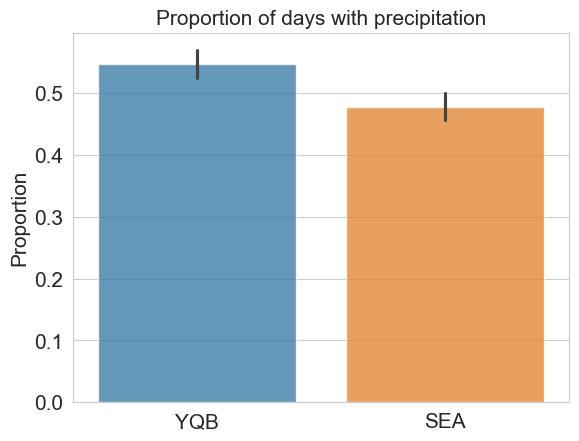

In [128]:
#Plot proportion of days with any precipitation
sns.barplot(data=new_df, x='city', y='any_precipitation', hue='city', alpha=0.75)

plt.ylabel('Proportion', fontsize=15)
plt.xlabel(None)
plt.title('Proportion of days with precipitation', fontsize=15)

plt.xticks([0, 1], ['YQB', 'SEA'])

plt.tick_params(labelsize=15)

plt.show()

In [129]:
#The barplot shows that Quebec has more days of precipitation than Seattle

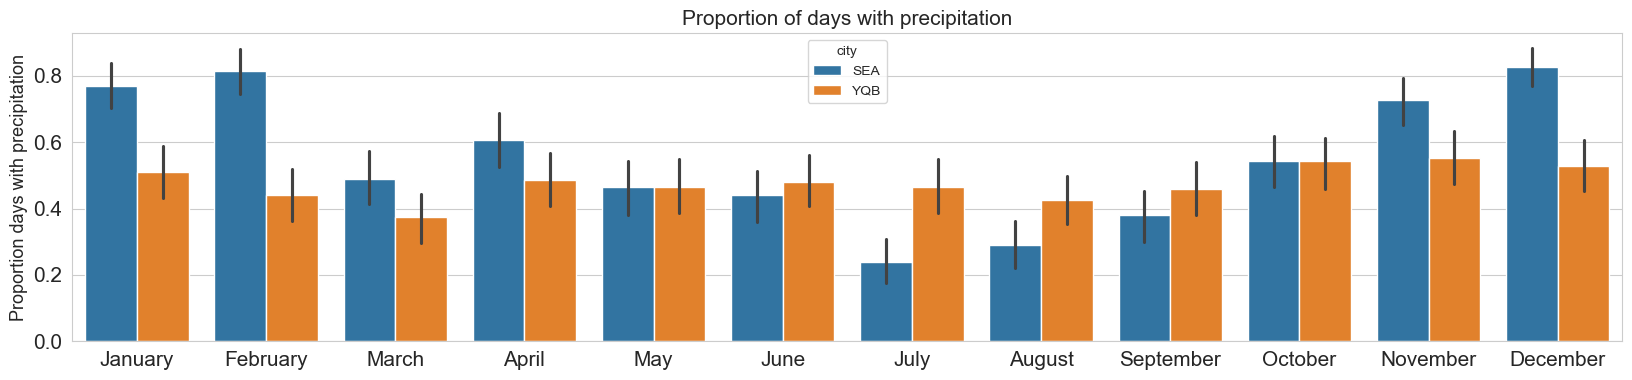

In [130]:
plt.figure(figsize=(20, 4))
sns.barplot(data= new_df, x="month", y="any_precipitation", hue="city")

plt.xlabel(None)
plt.ylabel("Proportion days with precipitation", fontsize=13)
plt.title('Proportion of days with precipitation', fontsize=15)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)
plt.show()

In [131]:
#The barplot shows a monthly view of the proportion of days with precipitation. It follows a similar trend to when we looked at mean monthly precipitation
#Quebec has more days of precipitation in January, February, March, April, November, and December
#Seattle has more days of precipitation in June, July, August, and September.

In [132]:
#Section 7: Conclusion
#In this project, we used statistical summaries and several graphical visualizations to 
#analyze two datasets that measured precipitation in Seattle and Quebec from 1/1/2018 through 12/21/2022.
#Precipitation rates between Seattle and Quebec were very similar. Seattle averaged 0.11 with Quebec slightly higher at 0.12. 
#We can observe different patterns of rainfall between the two cities.
#Quebec experienced high extremes of rain, with its max being 5.87 compared to Seattle's 2.6.
#We also observe Seattle tends to receive more rain in the winter months while Quebec tends to receive slightly more rain in the spring and summer months
#In conclusion, it tends to rain more in Seattle in the winter while in the summer it tends to rain more in Quebec.